# Implementation of SVM in  a custome dataset

#  Import libaries

In [1]:
import numpy as np
import matplotlib.pyplot as plt #visualization
from sklearn import svm  #svm function
from sklearn.datasets import make_blobs #create data from library

D:\software\anaconda3\envs\anupam\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Create a custome training dataset

In [2]:
X,y=make_blobs(n_samples=40, centers=2,random_state=20) #40 lines with 2 centres each group 20 pieces data

In [3]:
print("Length of X:", len(X))
print("Length of Y:", len(y))

Length of X: 40
Length of Y: 40


In [4]:
print("Shape of X: ", np.shape(X))
print("Shape of y: ", np.shape(y))

Shape of X:  (40, 2)
Shape of y:  (40,)


# Load it to SVM

In [5]:
clf = svm.SVC(kernel='linear', C=1) # 2lines of codes seed=1 no regulizer , linear -2D only
clf.fit(X,y) 

SVC(C=1, kernel='linear')

# Visualize the data

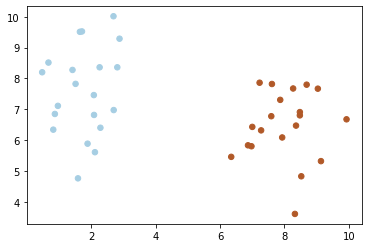

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired) #scatter plot just dots numpy array as X[:,0] - all rows only 1st value X Y plot, s=30 denotes the size of the dots, cmap for color
plt.show()

# Predict some unknown data

In [10]:
#prediction of new data
newData=[[3,4],[5,6]] 
print("Predicted Class for each of the data points: ",clf.predict(newData))

Predicted Class for each of the data points:  [0 1]


In [11]:
#prediction of new data
newData=[[8,9],[2,6]] 
print("Predicted Class for each of the data points: ",clf.predict(newData))

Predicted Class for each of the data points:  [1 0]


# Implementation of Decision Surface along with Support Vectors and margin

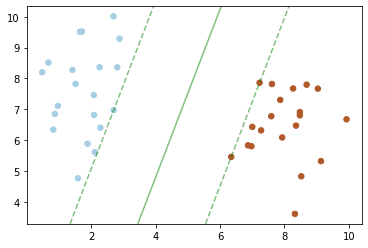

In [12]:
#fit the model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X,y)
plt.scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.Paired)

#plot the decision function
ax=plt.gca() 
xlim=ax.get_xlim() #get x-limit
ylim=ax.get_ylim() #get y-limit


#create grid to evaluate model
xx=np.linspace(xlim[0], xlim[1], 30) #create 30 points between 0 and 1
yy=np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy,xx)  #one array
xy=np.vstack([XX.ravel(), YY.ravel()]).T
Z= clf.decision_function(xy).reshape(XX.shape) #clf is support vector machine that is trained

#plot decison boundary and the support vectors
ax.contour(XX,YY, Z, colors='g', levels=[-1,0,1],
           alpha =0.5,
           linestyles=['--', '-','--'])
ax.scatter(clf.support_vectors_[:,0],
          clf.support_vectors_[:,1], s=100,
          linewidth=1, facecolors='none')
plt.show()
